* 성명 : 엄소은

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 경남

In [ ]:
kyungnam = pd.read_csv("/content/drive/MyDrive/DSL/경남.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


경북, 경남, 부산, 울산

In [ ]:
kyungnam.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25020779,시장부식,NaN,D,소매,D01,음/식료품소매,D01A13,청과물소매,G47214,...,4825011900106690007099187,NaN,경상남도 김해시 삼안로255번안길 16,621910,50814.0,NaN,NaN,NaN,128.909933,35.249401
1,20215402,동큐치킨,NaN,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,4827039021101310001067903,NaN,경상남도 밀양시 청도면 청도로 87,627862,50400.0,NaN,NaN,NaN,128.623576,35.549846
2,24338973,코오롱생수기,NaN,D,소매,D01,음/식료품소매,D01A01,식료품점,G47219,...,4825011900101790001086935,국제쇼핑타운,경상남도 김해시 활천로267번길 13,621909,50818.0,NaN,2,NaN,128.908148,35.244033
3,25376872,꽃밭에앉아서,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,4833033025100670002000001,NaN,경상남도 양산시 상북면 상삼2길 2,626852,50579.0,NaN,1,NaN,129.060657,35.423480
4,17173993,쏘맥,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,4887025022106120021010627,한들약국,경상남도 함양군 함양읍 용평1길 3,676805,50039.0,NaN,NaN,NaN,127.729075,35.520615


In [ ]:
print(kyungnam.columns)
len(kyungnam.columns)

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')


39

In [ ]:
kyungnam.isnull().sum()/len(kyungnam)

상가업소번호       0.000000
상호명          0.000000
상권업종대분류코드    0.000000
상권업종대분류명     0.000000
상권업종중분류코드    0.000000
상권업종중분류명     0.000000
상권업종소분류코드    0.000000
상권업종소분류명     0.000000
표준산업분류코드     0.063693
표준산업분류명      0.063693
시도코드         0.000000
시도명          0.000000
시군구코드        0.000000
시군구명         0.000000
행정동코드        0.000000
행정동명         0.000077
법정동코드        0.012773
법정동명         0.012773
지번코드         0.000000
대지구분코드       0.000000
대지구분명        0.000000
지번본번지        0.000000
지번부번지        0.178294
지번주소         0.000000
도로명코드        0.000000
도로명          0.000000
건물본번지        0.000000
건물관리번호       0.000000
도로명주소        0.000000
구우편번호        0.000000
신우편번호        0.000302
경도           0.000000
위도           0.000000
dtype: float64

- 결측치 비율 측정 결과, 50% 이상이 결측치인 변수

지점명(0.84), 건물부번지(0.77), 건물명(0.58),동정보(0.922), 층정보(0.61), 호정보(1.0)

를 삭제하기로 판단했다.

-  의미없다고 생각한 변수

- 의미있는 변수

위치: 경도, 위도 , 시군구명, 행정동명, 도로명

상호명분류: 상호명, '상권업종대분류명','상권업종중분류명', '상권업종소분류명', '표준산업분류명'

In [ ]:
# 중요치 않다고 여겨지거나 중복되는 의미를 지닌다고 생각하는 column 삭제 (drop 활용)
kyungnam.drop(columns=['상가업소번호', '지점명', '상권업종대분류코드', '상권업종중분류코드',
        '상권업종소분류코드', '표준산업분류코드', '시도코드',
       '시도명', '시군구코드', '행정동코드', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보'], inplace= True)

In [ ]:
kyungnam.isnull().sum()/len(kyungnam)

상호명         0.000000
상권업종대분류명    0.000000
상권업종중분류명    0.000000
상권업종소분류명    0.000000
표준산업분류명     0.063693
시군구명        0.000000
행정동명        0.000077
도로명         0.000000
경도          0.000000
위도          0.000000
dtype: float64

- 결측치가 존재하는 변수

표준산업분류명(obj), 행정동명(obj) -> 대체 어떻게?

In [ ]:
kyungnam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155793 entries, 0 to 155792
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       155793 non-null  object 
 1   상권업종대분류명  155793 non-null  object 
 2   상권업종중분류명  155793 non-null  object 
 3   상권업종소분류명  155793 non-null  object 
 4   표준산업분류명   145870 non-null  object 
 5   경도        155793 non-null  float64
 6   위도        155793 non-null  float64
dtypes: float64(2), object(5)
memory usage: 8.3+ MB


In [ ]:
#각 열마다의 null 값 처리해보기!
# null 값 대신 같은 type의 데이터로 replace 해주는 게 이후 분석에 있어서 용이할 것 같습니다!
# 예를 들어, float 데이터의 열에 null이 있을 경우, null 값에 0을 집어넣기. str 데이터의 열에 null이 있을 경우, "0" 대입해주기. 등등 방법은 다양합니다!
# 아래에 코드 작성 후 진행해주세요!

In [ ]:
kyungnam['표준산업분류명'].replace(to_replace=np.nan,value="0",inplace=True)
kyungnam['행정동명'].replace(to_replace=np.nan,value="0",inplace=True)

 결측치는 "0"(object)으로 대체함

 or 그냥 결측치가 있는 열을 삭제하는 방법도?

In [ ]:
kyungnam.isnull().sum()/len(kyungnam)

상호명         0.0
상권업종대분류명    0.0
상권업종중분류명    0.0
상권업종소분류명    0.0
표준산업분류명     0.0
시군구명        0.0
행정동명        0.0
도로명         0.0
경도          0.0
위도          0.0
dtype: float64

In [ ]:
kyungnam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155793 entries, 0 to 155792
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       155793 non-null  object 
 1   상권업종대분류명  155793 non-null  object 
 2   상권업종중분류명  155793 non-null  object 
 3   상권업종소분류명  155793 non-null  object 
 4   표준산업분류명   155793 non-null  object 
 5   시군구명      155793 non-null  object 
 6   행정동명      155793 non-null  object 
 7   도로명       155793 non-null  object 
 8   경도        155793 non-null  float64
 9   위도        155793 non-null  float64
dtypes: float64(2), object(8)
memory usage: 11.9+ MB


총 155793개의 데이터

## 간단한 분석

* pandas의 pivottable 기능을 이용해서 각자 자료를 2개씩 분석해 주세요

* 예시 
* 분석한 내용
> * 내가 조사한 경남 지역 관련 데이터의 경우, 이러한 업종의 소상공인 수가 많았다. 어느 지역이나 동에 특히 많이 있었다 등등의 정보를 탐색해보자!!
> * 내가 맡은 2~3개의 타 지역과 비교해보았을 때, 특정 업종이 많은 비율을 차지하는 것으로 보아 관광업에 종사하는 소상공인의 수가 많은 것으로 보인다.
> * 관광업의 소상공인의 경우, 숙박업의 비중이 높지 않을까?
> * 관광업 소상공인들의 데이터의 경우, 팬데믹 이전과 비교해보고 싶다. 왠지, 팬데믹 이전의 데이터도 찾을 수 있다면, 어느 업종에서 소상공인들이 큰 피해를 보고 소상공인의 수가 줄었는지 데이터를 통해 확인할 수 있지 않을까?

* 위와 같이, 꼬리에 꼬리를 무는 식으로 분석과 궁금한 점, 더 찾아보고 싶은 데이터가 무엇인지 알아볼 수 있는 기회로 이번 과제를 여겨주셨으면 감사하겠습니다:)

In [ ]:
kyungnam.groupby('상권업종소분류명')['상권업종소분류명'].count()

상권업종소분류명
LPG판매          146
가구수리             9
가구판매-돌침대        15
가구판매-사무용가구      35
가구판매-수입가구        3
              ... 
황토상품전문점          2
횟집            2558
후라이드/양념치킨     2755
휴게텔              9
휴대폰튜닝           14
Name: 상권업종소분류명, Length: 611, dtype: int64

In [ ]:
kyungnam.groupby('상권업종소분류명')['상호명'].count()

상권업종소분류명
LPG판매          146
가구수리             9
가구판매-돌침대        15
가구판매-사무용가구      35
가구판매-수입가구        3
              ... 
황토상품전문점          2
횟집            2558
후라이드/양념치킨     2755
휴게텔              9
휴대폰튜닝           14
Name: 상호명, Length: 611, dtype: int64

In [ ]:
pivot

## 첫번째 분석

* 분석한 내용 간단히 설명 :

- 동별 어떤 상권업종이 분포되어 있는지 분석

In [98]:
pivot_kn = pd.pivot_table(data = kyungnam, index = "상권업종중분류명", columns = "행정동명", aggfunc = "count", values="상호명",fill_value=0)
pd.DataFrame(pivot_kn)

행정동명,0,가곡동,가례면,가북면,가야면,가야읍,가음정동,가조면,가포동,가호동,...,화개면,화정면,활천동,회성동,회원1동,회원2동,회현동,회화면,횡천면,휴천면
상권업종중분류명,,,,,,,,,,,,,,,,,,,,,
PC/오락/당구/볼링등,0,1,0,0,0,7,9,0,0,23,...,1,0,19,0,6,0,3,2,0,0
가구소매,0,1,0,0,0,3,3,0,0,1,...,0,0,7,7,2,1,2,1,0,0
가방/신발/액세서리,0,0,0,0,2,6,12,0,0,2,...,0,0,5,1,8,2,16,2,0,0
가전제품소매,0,1,0,0,0,4,2,1,0,3,...,0,0,8,1,6,1,3,5,0,0
가정/주방/인테리어,3,6,1,0,6,28,45,6,0,13,...,5,0,66,23,25,8,16,7,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
학원기타,0,5,0,0,1,13,36,1,0,23,...,0,0,21,0,4,5,1,1,0,0
한식,1,62,7,9,104,160,130,65,13,177,...,111,6,200,29,61,21,63,76,26,16
행사/이벤트,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
pivot = pd.pivot_table(data = kyungnam, index = "상권업종대분류명", columns = "행정동명", aggfunc = "count", values="상호명",fill_value=0)
pd.DataFrame(pivot)

행정동명,0,가곡동,가례면,가북면,가야면,가야읍,가음정동,가조면,가포동,가호동,...,화개면,화정면,활천동,회성동,회원1동,회원2동,회현동,회화면,횡천면,휴천면
상권업종대분류명,,,,,,,,,,,,,,,,,,,,,
관광/여가/오락,0,3,0,0,1,17,23,3,1,44,...,4,0,45,6,21,3,13,4,0,0
부동산,1,3,0,1,2,30,39,3,1,63,...,3,1,61,8,11,2,16,8,0,0
생활서비스,3,50,1,2,34,154,187,28,3,194,...,11,1,367,64,122,59,88,39,11,3
소매,6,72,14,9,86,279,334,70,9,242,...,104,12,505,120,188,74,197,68,34,18
숙박,0,6,2,4,24,16,0,8,1,1,...,79,1,21,1,4,0,3,18,3,8
스포츠,0,0,2,0,1,18,13,2,1,14,...,1,0,28,0,8,4,5,2,2,4
음식,2,146,11,10,158,371,427,111,24,587,...,212,7,553,66,155,60,191,167,50,21
학문/교육,0,12,0,0,3,61,125,3,0,119,...,1,0,106,4,35,20,17,7,0,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46973 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47553 missing from current font.
  font.set_

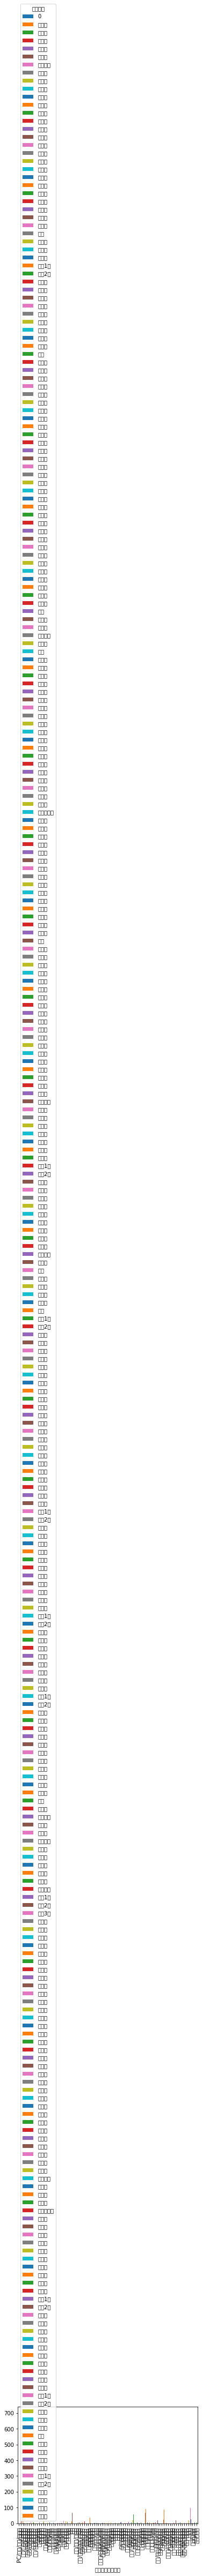

In [99]:
pivot_kn.plot.bar()
plt.show()

한글이 깨지는 문제 + 분류할 막대가 너무 많았다는 문제가 있었다. 

# 2. 부산

In [ ]:
busan = pd.read_csv("/content/drive/MyDrive/DSL/부산.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
busan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147799 entries, 0 to 147798
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     147799 non-null  int64  
 1   상호명        147798 non-null  object 
 2   지점명        22032 non-null   object 
 3   상권업종대분류코드  147799 non-null  object 
 4   상권업종대분류명   147799 non-null  object 
 5   상권업종중분류코드  147799 non-null  object 
 6   상권업종중분류명   147799 non-null  object 
 7   상권업종소분류코드  147799 non-null  object 
 8   상권업종소분류명   147799 non-null  object 
 9   표준산업분류코드   138317 non-null  object 
 10  표준산업분류명    138317 non-null  object 
 11  시도코드       147799 non-null  int64  
 12  시도명        147799 non-null  object 
 13  시군구코드      147799 non-null  int64  
 14  시군구명       147799 non-null  object 
 15  행정동코드      147799 non-null  int64  
 16  행정동명       147793 non-null  object 
 17  법정동코드      147799 non-null  int64  
 18  법정동명       147799 non-null  object 
 19  지번코드       147799 non-n

In [ ]:
# 중요치 않다고 여겨지거나 중복되는 의미를 지닌다고 생각하는 column 삭제 (drop 활용)
busan.drop(columns=['상가업소번호', '지점명', '상권업종대분류코드', '상권업종중분류코드',
        '상권업종소분류코드', '표준산업분류코드', '시도코드',
       '시도명', '시군구코드', '행정동코드', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보'], inplace= True)

In [ ]:
busan.isnull().sum()/len(busan)

상호명         0.000007
상권업종대분류명    0.000000
상권업종중분류명    0.000000
상권업종소분류명    0.000000
표준산업분류명     0.064155
시군구명        0.000000
행정동명        0.000041
도로명         0.000000
경도          0.000000
위도          0.000000
dtype: float64

결측치가 있는 열을 삭제했다.

In [74]:
busan =busan.dropna(axis=0)

In [75]:
busan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138310 entries, 0 to 147798
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       138310 non-null  object 
 1   상권업종대분류명  138310 non-null  object 
 2   상권업종중분류명  138310 non-null  object 
 3   상권업종소분류명  138310 non-null  object 
 4   표준산업분류명   138310 non-null  object 
 5   시군구명      138310 non-null  object 
 6   행정동명      138310 non-null  object 
 7   도로명       138310 non-null  object 
 8   경도        138310 non-null  float64
 9   위도        138310 non-null  float64
dtypes: float64(2), object(8)
memory usage: 11.6+ MB


In [76]:
pivot = pd.pivot_table(data = busan, index = "상권업종중분류명", columns = "행정동명", aggfunc = "count", values="상호명",fill_value=0)
pd.DataFrame(pivot)

행정동명,가덕도동,가락동,가야1동,가야2동,감만1동,감만2동,감전동,감천1동,감천2동,강동동,...,초량6동,초읍동,초장동,충무동,하단1동,하단2동,학장동,화명1동,화명2동,화명3동
상권업종중분류명,,,,,,,,,,,,,,,,,,,,,
PC/오락/당구/볼링등,0,0,4,7,2,0,7,8,3,1,...,0,10,0,2,11,23,11,1,3,18
가구소매,1,7,3,0,2,0,16,1,3,5,...,0,1,0,1,6,2,4,4,0,1
가방/신발/액세서리,1,2,10,5,3,2,34,13,2,9,...,1,6,2,20,14,10,14,2,3,5
가전제품소매,0,0,10,2,0,0,10,5,3,3,...,1,2,1,8,10,3,2,5,2,4
가정/주방/인테리어,3,13,28,20,13,5,107,17,9,41,...,2,20,1,16,30,35,37,20,20,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
학원-컴퓨터,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,3,0,1,0,0,3
학원기타,0,0,11,7,2,3,1,8,0,2,...,7,9,0,4,18,18,22,21,6,54
한식,43,31,76,81,49,11,148,75,16,49,...,21,123,4,87,126,186,87,52,54,150


In [77]:
pivot = pd.pivot_table(data = busan, index = "상권업종대분류명", columns = "행정동명", aggfunc = "count", values="상호명",fill_value=0)
pd.DataFrame(pivot)

행정동명,가덕도동,가락동,가야1동,가야2동,감만1동,감만2동,감전동,감천1동,감천2동,강동동,...,초량6동,초읍동,초장동,충무동,하단1동,하단2동,학장동,화명1동,화명2동,화명3동
상권업종대분류명,,,,,,,,,,,,,,,,,,,,,
관광/여가/오락,2,0,18,17,11,0,19,12,4,5,...,0,24,0,15,28,74,24,9,10,38
부동산,7,24,14,29,14,2,45,18,1,48,...,5,30,0,18,43,70,43,35,19,43
생활서비스,14,17,100,75,55,27,165,71,43,35,...,19,133,16,76,140,192,125,102,57,132
소매,57,87,201,160,146,61,679,185,72,199,...,46,228,21,218,305,321,320,167,121,190
숙박,3,0,1,0,0,0,14,9,0,0,...,1,14,0,21,5,14,5,0,1,8
스포츠,0,3,10,5,4,2,13,7,1,5,...,2,19,0,9,11,24,21,11,6,33
음식,102,58,234,206,101,61,335,179,56,98,...,49,329,11,226,308,619,215,170,167,480
학문/교육,2,4,49,45,26,10,17,60,4,5,...,16,41,2,17,132,109,72,69,37,208


# 경북

In [79]:
kyungbuk = pd.read_csv("/content/drive/MyDrive/DSL/경북.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [85]:
# 중요치 않다고 여겨지거나 중복되는 의미를 지닌다고 생각하는 column 삭제 (drop 활용)
kyungbuk.drop(columns=['상가업소번호', '지점명', '상권업종대분류코드', '상권업종중분류코드',
        '상권업종소분류코드', '표준산업분류코드', '시도코드',
       '시도명', '시군구코드', '행정동코드', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보'], inplace= True)

In [86]:
kyungbuk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133941 entries, 0 to 133940
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       133941 non-null  object 
 1   상권업종대분류명  133941 non-null  object 
 2   상권업종중분류명  133941 non-null  object 
 3   상권업종소분류명  133941 non-null  object 
 4   표준산업분류명   125575 non-null  object 
 5   시군구명      133941 non-null  object 
 6   행정동명      133934 non-null  object 
 7   도로명       133941 non-null  object 
 8   경도        133941 non-null  float64
 9   위도        133941 non-null  float64
dtypes: float64(2), object(8)
memory usage: 10.2+ MB


In [87]:
kyungbuk.isnull().sum()/len(kyungbuk)

상호명         0.000000
상권업종대분류명    0.000000
상권업종중분류명    0.000000
상권업종소분류명    0.000000
표준산업분류명     0.062460
시군구명        0.000000
행정동명        0.000052
도로명         0.000000
경도          0.000000
위도          0.000000
dtype: float64

In [88]:
kyungbuk['표준산업분류명'].replace(to_replace=np.nan,value="0",inplace=True)
kyungbuk['행정동명'].replace(to_replace=np.nan,value="0",inplace=True)

In [89]:
pivot = pd.pivot_table(data = kyungbuk, index = "상권업종중분류명", columns = "행정동명", aggfunc = "count", values="상호명",fill_value=0)
pd.DataFrame(pivot)

행정동명,0,가산면,가은읍,가음면,가천면,가흥1동,가흥2동,각남면,각북면,감문면,...,황성동,황오동,효곡동,효령면,효자면,후포면,휴천1동,휴천2동,휴천3동,흥해읍
상권업종중분류명,,,,,,,,,,,,,,,,,,,,,
PC/오락/당구/볼링등,0,0,1,0,0,12,1,0,0,0,...,12,5,10,0,0,7,1,11,1,3
가구소매,0,27,0,0,0,1,3,0,0,0,...,3,17,2,0,0,1,1,1,1,8
가방/신발/액세서리,0,3,0,0,2,4,5,0,0,0,...,7,48,9,2,0,9,2,4,1,16
가전제품소매,0,1,2,2,0,2,9,0,0,0,...,8,6,4,1,0,5,1,6,1,5
가정/주방/인테리어,0,17,7,0,3,20,11,2,1,0,...,38,51,12,3,0,13,11,32,15,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
학원기타,0,0,0,0,1,12,5,1,0,0,...,53,9,30,0,0,4,6,6,4,29
한식,1,64,62,10,32,185,47,9,33,26,...,153,111,153,20,4,118,40,157,37,244
행사/이벤트,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,1


In [90]:
pivot = pd.pivot_table(data = kyungbuk, index = "상권업종대분류명", columns = "행정동명", aggfunc = "count", values="상호명",fill_value=0)
pd.DataFrame(pivot)

행정동명,0,가산면,가은읍,가음면,가천면,가흥1동,가흥2동,각남면,각북면,감문면,...,황성동,황오동,효곡동,효령면,효자면,후포면,휴천1동,휴천2동,휴천3동,흥해읍
상권업종대분류명,,,,,,,,,,,,,,,,,,,,,
관광/여가/오락,0,1,2,0,3,26,5,0,1,0,...,25,11,25,2,0,16,6,18,3,21
부동산,1,8,3,1,5,32,17,2,2,1,...,40,18,35,3,0,2,3,13,8,75
생활서비스,0,40,30,5,16,157,61,6,12,11,...,281,205,182,25,1,92,88,159,82,224
소매,2,128,58,19,28,199,159,21,22,28,...,383,571,254,44,11,209,109,231,86,594
숙박,0,11,17,0,22,2,4,4,13,0,...,3,46,0,3,0,31,0,34,1,44
스포츠,0,1,0,0,0,13,3,1,0,0,...,25,2,17,0,0,5,2,8,2,14
음식,4,107,93,17,64,420,108,13,49,49,...,414,289,449,38,6,349,73,351,76,689
학문/교육,0,2,2,0,1,56,25,1,0,0,...,237,22,108,1,1,17,37,41,34,132


# 울산

In [81]:
ulsan = pd.read_csv("/content/drive/MyDrive/DSL/울산.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [91]:
# 중요치 않다고 여겨지거나 중복되는 의미를 지닌다고 생각하는 column 삭제 (drop 활용)
ulsan.drop(columns=['상가업소번호', '지점명', '상권업종대분류코드', '상권업종중분류코드',
        '상권업종소분류코드', '표준산업분류코드', '시도코드',
       '시도명', '시군구코드', '행정동코드', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보'], inplace= True)

In [92]:
ulsan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46270 entries, 0 to 46269
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       46270 non-null  object 
 1   상권업종대분류명  46270 non-null  object 
 2   상권업종중분류명  46270 non-null  object 
 3   상권업종소분류명  46270 non-null  object 
 4   표준산업분류명   43210 non-null  object 
 5   시군구명      46270 non-null  object 
 6   행정동명      46269 non-null  object 
 7   도로명       46270 non-null  object 
 8   경도        46270 non-null  float64
 9   위도        46270 non-null  float64
dtypes: float64(2), object(8)
memory usage: 3.5+ MB


In [93]:
ulsan.isnull().sum()/len(ulsan)

상호명         0.000000
상권업종대분류명    0.000000
상권업종중분류명    0.000000
상권업종소분류명    0.000000
표준산업분류명     0.066134
시군구명        0.000000
행정동명        0.000022
도로명         0.000000
경도          0.000000
위도          0.000000
dtype: float64

In [94]:
ulsan['표준산업분류명'].replace(to_replace=np.nan,value="0",inplace=True)
ulsan['행정동명'].replace(to_replace=np.nan,value="0",inplace=True)

In [95]:
pivot = pd.pivot_table(data = ulsan, index = "상권업종중분류명", columns = "행정동명", aggfunc = "count", values="상호명",fill_value=0)
pd.DataFrame(pivot)

행정동명,0,강동동,남목1동,남목2동,남목3동,농소1동,농소2동,농소3동,다운동,달동,...,일산동,전하1동,전하2동,중앙동,청량면,청량읍,태화동,학성동,화정동,효문동
상권업종중분류명,,,,,,,,,,,,,,,,,,,,,
PC/오락/당구/볼링등,0,5,6,2,1,15,5,7,6,13,...,7,3,5,11,0,4,11,2,8,13
가구소매,0,1,1,3,0,8,2,2,9,2,...,2,1,2,9,0,3,2,58,2,17
가방/신발/액세서리,0,2,2,5,2,9,1,4,5,11,...,3,2,3,69,0,2,5,12,8,8
가전제품소매,0,0,1,4,0,1,2,6,1,13,...,4,2,0,4,0,1,2,3,1,10
가정/주방/인테리어,0,4,6,12,6,36,24,23,57,55,...,8,12,10,82,4,23,22,27,20,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
학원기타,0,11,5,12,9,32,32,28,16,31,...,3,15,13,1,0,9,19,3,12,18
한식,0,129,71,43,31,227,114,103,114,225,...,129,60,54,141,9,119,129,61,64,253
행사/이벤트,0,0,0,0,0,0,0,1,0,2,...,0,0,0,1,0,1,0,0,0,3


In [96]:
pivot = pd.pivot_table(data = ulsan, index = "상권업종대분류명", columns = "행정동명", aggfunc = "count", values="상호명",fill_value=0)
pd.DataFrame(pivot)

행정동명,0,강동동,남목1동,남목2동,남목3동,농소1동,농소2동,농소3동,다운동,달동,...,일산동,전하1동,전하2동,중앙동,청량면,청량읍,태화동,학성동,화정동,효문동
상권업종대분류명,,,,,,,,,,,,,,,,,,,,,
관광/여가/오락,0,16,19,4,6,40,15,10,17,50,...,18,6,18,43,1,10,23,10,23,38
부동산,0,26,3,8,7,42,40,26,27,70,...,3,14,11,35,4,17,33,7,10,34
생활서비스,0,43,49,45,36,207,170,128,191,374,...,50,84,83,258,10,109,147,83,94,314
소매,1,106,79,155,76,355,216,212,305,438,...,107,96,118,801,20,161,238,247,157,536
숙박,0,39,3,0,4,5,2,0,1,21,...,13,14,7,38,0,1,7,15,8,8
스포츠,0,6,2,4,2,18,15,19,3,23,...,3,15,3,9,0,4,12,3,6,33
음식,0,434,166,131,144,561,338,299,251,628,...,354,184,215,511,26,269,410,138,189,633
학문/교육,0,33,25,46,34,112,137,155,77,145,...,9,47,56,27,7,46,104,15,59,77
